In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и подготовка данных

In [2]:
data = {}
for i in range(3):
    try:
        data[i] = pd.read_csv(f'/datasets/geo_data_{i}.csv').drop(columns=['id'])
    except:
        data[i] =pd.read_csv(f'https://code.s3.yandex.net/datasets/geo_data_{i}.csv').drop(columns=['id']) 

Загружаю данные из трех датасетов в цикле, столбец id не несет полезной информации для анализа, его удаляю.

In [3]:
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    display(data[i])
    display(data[i].describe())
    display(data[i].isna().sum())  

---------------------------------------------
Region-0
---------------------------------------------


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


f0         0
f1         0
f2         0
product    0
dtype: int64

---------------------------------------------
Region-1
---------------------------------------------


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


f0         0
f1         0
f2         0
product    0
dtype: int64

---------------------------------------------
Region-2
---------------------------------------------


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


f0         0
f1         0
f2         0
product    0
dtype: int64

Датасет для каждого из трех регионов содержит 4 колонки (f0, f1, f2 - предсказывающие, prodact - предсказываемая), 100000 строк. Пустых значений нет. Предсказывающие колонки нужно подвергнуть стандартизации, чтобы улучшить точность предсказания линейной регресиии.

In [4]:
X_train = {}
X_valid = {}
y_train = {}
y_valid = {}
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    X_train[i], X_valid[i], y_train[i], y_valid[i] = train_test_split(data[i].drop(columns=['product']),
                                                                      data[i]['product'],
                                                                      test_size=0.25, 
                                                                      random_state=42)
    print('Train')
    display(X_train[i])
    display(y_train[i])
    print('Valid')
    display(X_valid[i])
    display(y_valid[i])

---------------------------------------------
Region-0
---------------------------------------------
Train


,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607
...,...,...,...
6265,1.626462,-0.107752,2.951064
54886,1.682364,-0.193385,-1.175390
76820,0.979059,-0.550693,2.897510
860,0.652792,-0.484070,7.155391


98980    105.179287
69824      9.351083
9928     117.266771
75599    116.537717
95621    110.712818
            ...    
6265     131.201639
54886     86.899956
76820    156.871815
860       83.755210
15795     47.077062
Name: product, Length: 75000, dtype: float64

Valid


,f0,f1,f2
75721,0.599283,-0.557623,2.121187
80184,0.739017,-0.463156,-1.347584
19864,1.422743,-0.534917,3.718798
76699,1.580244,-0.238458,2.805149
92991,0.918974,0.023961,2.598575
...,...,...,...
21271,0.754647,-0.512213,2.610771
34014,-0.062056,0.516884,0.714446
81355,0.593769,-0.425260,-0.525017
65720,0.198209,0.453940,1.497557


75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: product, Length: 25000, dtype: float64

---------------------------------------------
Region-1
---------------------------------------------
Train


,f0,f1,f2
98980,9.296378,-4.480220,1.999544
69824,15.836796,1.952969,4.989288
9928,-1.594937,-0.407367,3.003358
75599,12.335752,-6.508978,2.001396
95621,-4.954638,-8.026328,1.001472
...,...,...,...
6265,-9.097344,-9.935211,0.996925
54886,2.490913,-3.577409,4.003892
76820,11.419499,3.616041,0.998035
860,-2.206408,-6.205406,0.008217


98980     53.906522
69824    134.766305
9928      84.038886
75599     53.906522
95621     30.132364
            ...    
6265      30.132364
54886    107.813044
76820     26.953261
860        0.000000
15795    134.766305
Name: product, Length: 75000, dtype: float64

Valid


,f0,f1,f2
75721,6.078076,0.084568,0.002957
80184,16.462386,2.712946,1.993030
19864,7.051898,0.766983,4.990194
76699,-0.240045,-0.380804,3.999693
92991,13.350111,-8.558281,0.002010
...,...,...,...
21271,8.141417,-0.832158,4.001976
34014,16.601751,-8.141232,2.010371
81355,14.674777,-5.633890,1.004171
65720,-1.381118,-5.464254,4.001648


75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
            ...    
21271    107.813044
34014     53.906522
81355     26.953261
65720    110.992147
11627    134.766305
Name: product, Length: 25000, dtype: float64

---------------------------------------------
Region-2
---------------------------------------------
Train


,f0,f1,f2
98980,-0.592927,-2.323059,5.344840
69824,-0.690844,1.715501,-1.331142
9928,1.741680,-1.604639,0.499745
75599,-1.354850,0.984588,5.683113
95621,1.075114,1.175117,1.010025
...,...,...,...
6265,-1.842672,-0.003145,0.926830
54886,0.079216,1.076507,3.761491
76820,-2.285696,1.500897,-1.051454
860,-1.446403,-2.164471,3.334692


98980    122.402114
69824     43.299623
9928     144.915121
75599    114.038791
95621     95.600308
            ...    
6265      54.598839
54886     63.428292
76820     37.780858
860       68.317185
15795    147.700315
Name: product, Length: 75000, dtype: float64

Valid


,f0,f1,f2
75721,2.111118,-1.679773,3.112240
80184,0.734759,0.747788,3.670879
19864,-2.513109,0.844631,-4.922889
76699,-2.035301,-1.522988,5.072839
92991,2.744145,1.429952,-1.372661
...,...,...,...
21271,-1.532677,0.365315,3.840436
34014,1.381244,1.168552,2.262261
81355,2.902487,0.839203,-2.817721
65720,0.942093,-1.424641,0.567559


75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
            ...    
21271     40.797226
34014     87.144239
81355     52.039812
65720    136.961454
11627    109.173206
Name: product, Length: 25000, dtype: float64

Разделила датасет каждого региона на обучающую и валидационную выборки в соотнощении 75:25.

In [5]:
def get_standart_data(X_train, X_valid):
    scaler = StandardScaler()
    scaler.fit(X_train)
    return (pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index), 
            pd.DataFrame(data=scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index))
#функция принимает два датасета X_train, X_valid, обучает экземпляр StandardScaler на X_train, трансформирует X_train, X_valid,
#выдает кортеж из стандартизированных датасетов X_train, X_valid

In [6]:
X_standart_train = {}
X_standart_valid = {}
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    X_standart_train[i], X_standart_valid[i] = get_standart_data(X_train[i], X_valid[i])
    print('Train')
    display(X_standart_train[i])
    display(X_standart_train[i].describe())
    print('Valid')
    display(X_standart_valid[i])
    display(X_standart_valid[i].describe())

---------------------------------------------
Region-0
---------------------------------------------
Train


,f0,f1,f2
98980,1.274786,-0.799739,-0.396677
69824,-1.600689,0.234678,-2.169283
9928,-0.323791,1.436297,1.495425
75599,0.439038,0.830679,0.185881
95621,-1.652805,0.761012,0.111734
...,...,...,...
6265,1.291452,-0.712129,0.135573
54886,1.355542,-0.882161,-1.134411
76820,0.549229,-1.591632,0.119090
860,0.175176,-1.459344,1.429524


,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,-9.488114e-17,3.628505e-17,3.273234e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.188139e+00,-2.182397e+00,-3.892907e+00
25%,-6.589992e-01,-8.917428e-01,-6.836300e-01
50%,3.205561e-03,2.611348e-03,4.889632e-03
75%,6.547445e-01,8.901383e-01,6.809043e-01
max,2.135099e+00,2.145152e+00,4.152764e+00


Valid


,f0,f1,f2
75721,0.113830,-1.605391,-0.119836
80184,0.274030,-1.417818,-1.187407
19864,1.057896,-1.560307,0.371855
76699,1.238466,-0.971658,0.090665
92991,0.480343,-0.450600,0.027088
...,...,...,...
21271,0.291949,-1.515226,0.030842
34014,-0.644370,0.528145,-0.552783
81355,0.107509,-1.342572,-0.934248
65720,-0.345986,0.403163,-0.311768


,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,0.001946,-0.005980,-0.009740
std,0.998089,1.006369,0.998770
min,-2.015492,-2.175823,-4.493047
25%,-0.650799,-0.915047,-0.685719
50%,0.000411,-0.013012,-0.007607
75%,0.666343,0.900522,0.672512
max,2.042207,2.170004,3.848217


---------------------------------------------
Region-1
---------------------------------------------
Train


,f0,f1,f2
98980,0.911229,0.063780,-0.291331
69824,1.640885,1.320793,1.463778
9928,-0.303818,0.859595,0.297952
75599,1.250304,-0.332629,-0.290244
95621,-0.678630,-0.629111,-0.877242
...,...,...,...
6265,-1.140795,-1.002097,-0.879911
54886,0.152004,0.240185,0.885308
76820,1.148086,1.645749,-0.879260
860,-0.372035,-0.273312,-1.460326


,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,-2.283211e-17,5.532759e-17,1.630459e-16
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.652284e+00,-4.211144e+00,-1.475801e+00
25%,-8.296259e-01,-6.770941e-01,-8.780706e-01
50%,4.018308e-03,-3.411787e-03,-2.839520e-01
75%,8.338530e-01,6.796487e-01,8.829801e-01
max,3.156437e+00,4.209555e+00,1.481644e+00


Valid


,f0,f1,f2
75721,0.552191,0.955717,-1.463414
80184,1.710676,1.469288,-0.295155
19864,0.660832,1.089057,1.464310
76699,-0.152665,0.864785,0.882843
92991,1.363467,-0.733052,-1.463970
...,...,...,...
21271,0.782380,0.776593,0.884183
34014,1.726224,-0.651563,-0.284975
81355,1.511249,-0.161641,-0.875658
65720,-0.279964,-0.128495,0.883991


,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,0.005756,0.007861,-0.002983
std,1.000983,1.001564,1.000277
min,-2.891676,-4.021811,-1.475122
25%,-0.824942,-0.672973,-0.878141
50%,-0.000730,0.003368,-0.285100
75%,0.842284,0.677099,0.882936
max,3.042560,4.599733,1.479434


---------------------------------------------
Region-2
---------------------------------------------
Train


,f0,f1,f2
98980,-0.343864,-1.338311,0.817572
69824,-0.400431,0.993613,-1.102974
9928,1.004849,-0.923485,-0.576264
75599,-0.784031,0.571573,0.914886
95621,0.619771,0.681588,-0.429467
...,...,...,...
6265,-1.065848,0.001242,-0.453401
54886,0.044436,0.624649,0.362074
76820,-1.321785,0.869697,-1.022513
860,-0.836921,-1.246740,0.239293


,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,5.305386e-18,-1.203186e-17,-1.818989e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-5.062022e+00,-4.087359e+00,-4.163654e+00
25%,-6.722684e-01,-6.782630e-01,-6.790620e-01
50%,4.116749e-03,-4.496735e-03,-1.457466e-03
75%,6.671673e-01,6.742285e-01,6.800652e-01
max,4.180251e+00,4.532761e+00,4.095557e+00


Valid


,f0,f1,f2
75721,1.218275,-0.966868,0.175298
80184,0.423146,0.434841,0.336007
19864,-1.453162,0.490760,-2.136247
76699,-1.177130,-0.876338,0.739322
92991,1.583978,0.828733,-1.114918
...,...,...,...
21271,-0.886762,0.213996,0.384785
34014,0.796624,0.677797,-0.069224
81355,1.675453,0.487626,-1.530632
65720,0.542924,-0.819551,-0.556756


,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,-0.000635,0.007425,-0.008932
std,1.002439,0.996648,0.996926
min,-3.534406,-3.873919,-3.945092
25%,-0.675291,-0.666497,-0.689793
50%,0.004097,0.001848,-0.016347
75%,0.671700,0.677995,0.670447
max,4.167116,4.484868,3.781781


Провела стандартизацию обучающей и валидационной выборок для каждого региона, с помощью describe можно увидеть, что колонки имеют теперь стандартную форму.

Вывод:

Загрузила данные по трем регионам в словарь датасетов

Проверила размер данных и наличие пропущенных ячеек

Разделила данные на обучающую и валидационную выборки для каждого региона

Провела стандартизацию колонок

Данные готовы для обучения

## Обучение и проверка модели

In [7]:
y_pred = {}
model = LinearRegression(fit_intercept=True, n_jobs=-1)
for i in range(3):
    model.fit(X_standart_train[i], y_train[i])
    y_pred[i] = pd.Series(model.predict(X_standart_valid[i]), index=X_standart_valid[i].index)

Три раза обучаю модель линейной регрессии для каждого региона отдельно, предсказания на валидационоой выборке сохраняю в колонке predict.

In [8]:
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    print('True')
    display(y_valid[i])
    print('Predict')
    display(y_pred[i])

---------------------------------------------
Region-0
---------------------------------------------
True


75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: product, Length: 25000, dtype: float64

Predict


75721    101.901017
80184     78.217774
19864    115.266901
76699    105.618618
92991     97.980185
            ...    
21271    105.076959
34014     74.768176
81355     82.544397
65720     81.826689
11627     93.121062
Length: 25000, dtype: float64

---------------------------------------------
Region-1
---------------------------------------------
True


75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
            ...    
21271    107.813044
34014     53.906522
81355     26.953261
65720    110.992147
11627    134.766305
Name: product, Length: 25000, dtype: float64

Predict


75721      0.844738
80184     52.921612
19864    135.110385
76699    109.494863
92991     -0.047292
            ...    
21271    108.351600
34014     53.604049
81355     26.708734
65720    109.823087
11627    135.448780
Length: 25000, dtype: float64

---------------------------------------------
Region-2
---------------------------------------------
True


75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
            ...    
21271     40.797226
34014     87.144239
81355     52.039812
65720    136.961454
11627    109.173206
Name: product, Length: 25000, dtype: float64

Predict


75721     98.301916
80184    101.592461
19864     52.449099
76699    109.922127
92991     72.411847
            ...    
21271    102.764169
34014     93.431823
81355     64.098390
65720     83.764135
11627     86.558644
Length: 25000, dtype: float64

Истиные и предсказанные значения таргета на валидационных выборках

In [9]:
y_pred_mean = []
RMSE = []
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    y_pred_mean.append(y_pred[i].mean())
    print('Средний запас предсказанного сырья:', y_pred_mean[i])
    RMSE.append(sqrt(mean_squared_error(y_valid[i], y_pred[i])))
    print('RMSE:', RMSE[i])

---------------------------------------------
Region-0
---------------------------------------------
Средний запас предсказанного сырья: 92.39879990657768
RMSE: 37.75660035026169
---------------------------------------------
Region-1
---------------------------------------------
Средний запас предсказанного сырья: 68.7128780391376
RMSE: 0.8902801001028842
---------------------------------------------
Region-2
---------------------------------------------
Средний запас предсказанного сырья: 94.77102387765939
RMSE: 40.145872311342174


Вывела средний запас предсказанного сырья и RMSE по каждому региону. Модели Регион-0 и Регион-2 показали очень похожие результаты по среднему запасу предсказанного сырья (92, 95) и по значениям ошибки (38, 40). Результаты модели по Региону-1 очень отличаются - средний запас значительно меньше (69), но ошибка меньше 1. По Региону-1 предсказанные значения очень близки к таргету.

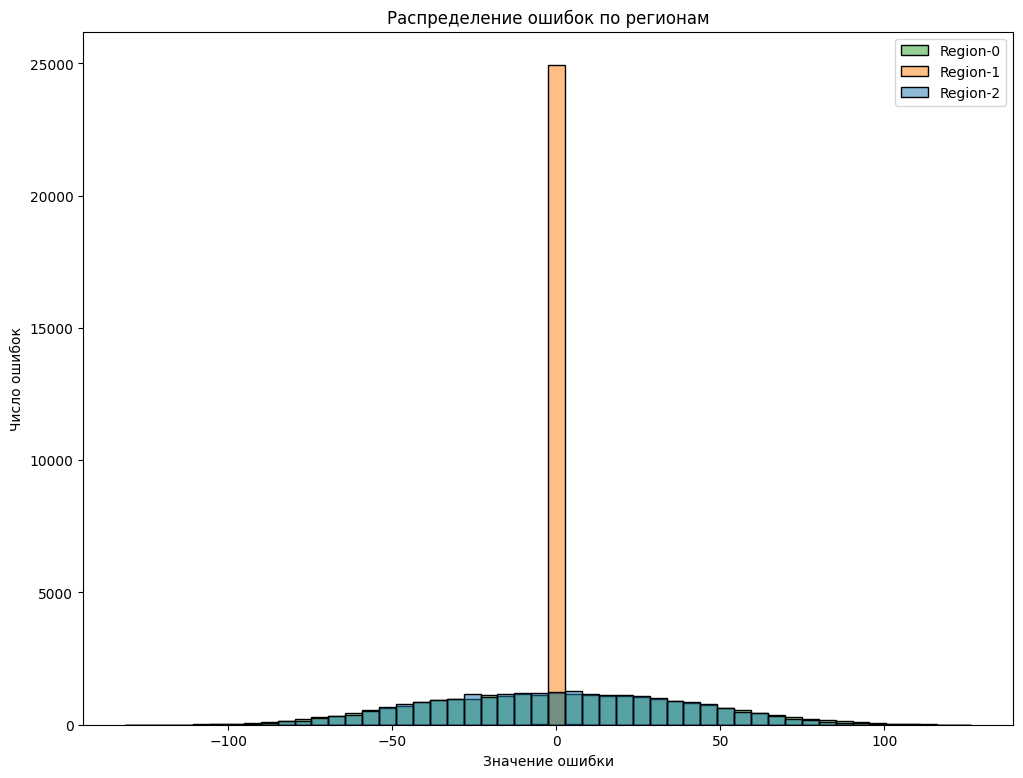

In [10]:
plt.figure(figsize=(12, 9))
sns.histplot((pd.DataFrame(y_valid) - pd.DataFrame(y_pred)), bins=50, alpha=0.5)
plt.legend(['Region-0', 'Region-1', 'Region-2'])
plt.title('Распределение ошибок по регионам')
plt.xlabel('Значение ошибки')
plt.ylabel('Число ошибок')
plt.show()

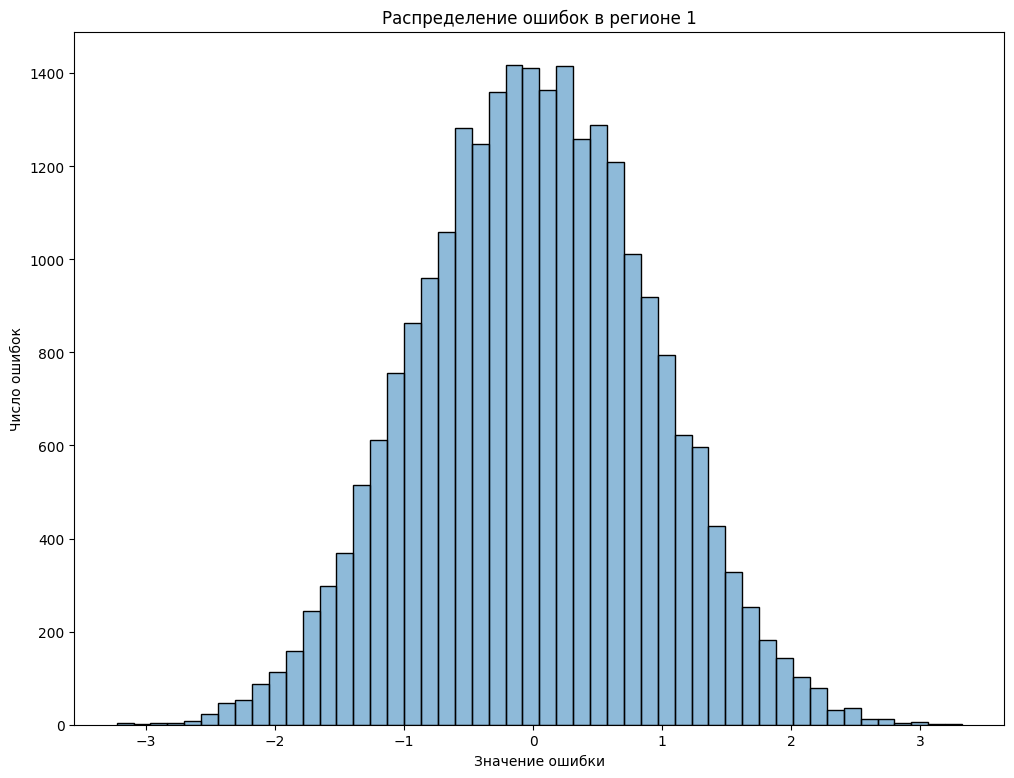

In [11]:
plt.figure(figsize=(12, 9))
sns.histplot((y_valid[1] - y_pred[1]), bins=50, alpha=0.5)
plt.title('Распределение ошибок в регионе 1')
plt.xlabel('Значение ошибки')
plt.ylabel('Число ошибок')
plt.show()

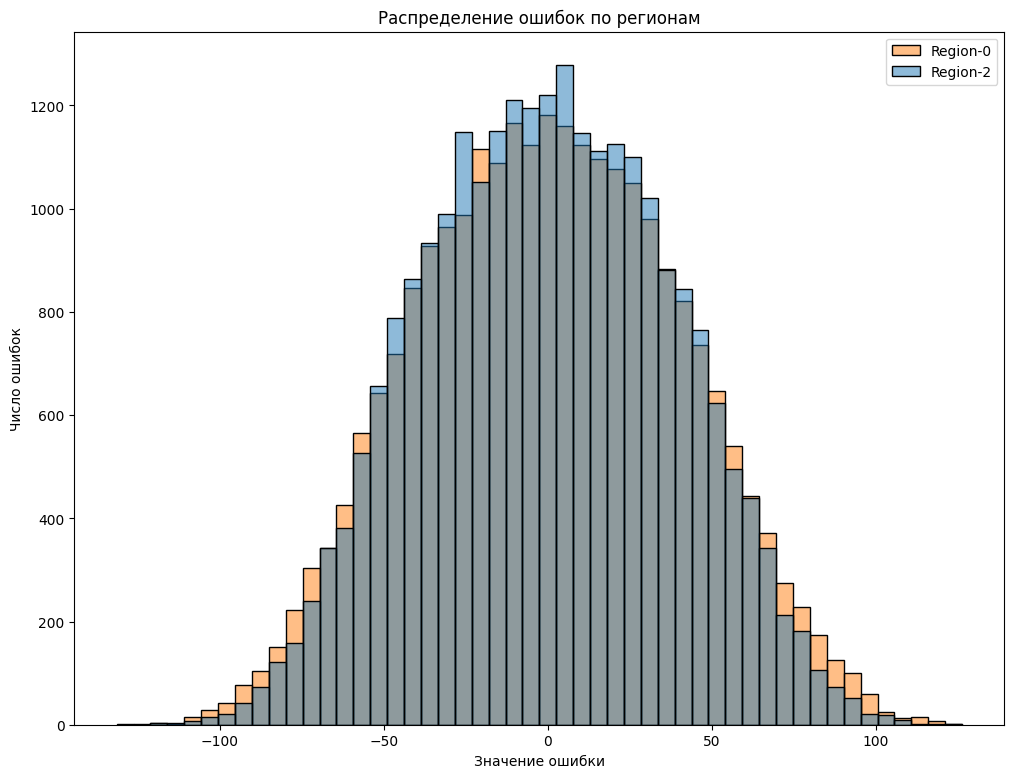

In [12]:
plt.figure(figsize=(12, 9))
sns.histplot((pd.DataFrame(y_valid).iloc[:,[0, 2]] - pd.DataFrame(y_pred).iloc[:,[0, 2]]), bins=50, alpha=0.5)
plt.legend(['Region-0', 'Region-2'])
plt.title('Распределение ошибок по регионам')
plt.xlabel('Значение ошибки')
plt.ylabel('Число ошибок')
plt.show()

По графикам видно, что ошибки моделей имеют распределения близкие к нормальному со средним в 0, для Региона-0 и Региона-2 распределения практически идентичны, у Региона-1 разброс ошибок значительно меньше.

Вывод:

Для данных по каждому региону обучена модель LinearRegression(fit_intercept=True, n_jobs=-1) на обучающей выбоке и получены предсказания для валидационной выборки, предсказания сохранены в y_pred.

По предсказаниям и истинным значениям по каждому региону вычислены средний запас предсказанного сырья и оценка RMSE, сохранены в переменные.

Модели Регионов 0 и 2 показали схожие средние запасы предсказанного сырья, RMSE и распределения ошибок, Регион-1 показывает более низкие показатель среднего запаса сырья, значительно более низкий RMSE и меньший разброс ошибок.



## Подготовка к расчёту прибыли

In [13]:
min_profitable_product = 10000000 / 200 / 450
min_profitable_product

111.11111111111111

10000000 тыс. рублей (бюджет на разработку скважин в регионе) делю на 200 (количество точек, по которым будет проводиться разработка) делю на 450 тыс. рублей (доход с тысячи баррелей). Получается, достаточный объём сырья для безубыточной разработки новой скважины примерно 111 тыс. баррелей.

In [14]:
y_valid_mean = []
for i in range(3):
    print('---------------------------------------------')
    print(f'Region-{i}')
    print('---------------------------------------------')
    y_valid_mean.append(y_valid[i].mean())
    print('Средний запас сырья:', y_valid_mean[i])

---------------------------------------------
Region-0
---------------------------------------------
Средний запас сырья: 92.32595637084387
---------------------------------------------
Region-1
---------------------------------------------
Средний запас сырья: 68.72538074722745
---------------------------------------------
Region-2
---------------------------------------------
Средний запас сырья: 95.15099907171961


Для каждого региона средний запас серья по точкам не превышает порог минимального безубыточного запаса для разработки.

Вывод:

Чтобы не быть убыточной, точка должна давать более 111 тыс. баррелей.

In [15]:
def get_sum_profit(y_true, y_pred, n, profit_per_barrel, expenses_per_point):
    return sum(y_true[y_pred.sort_values(ascending=False)[:n].index] * profit_per_barrel - expenses_per_point)

y_true - вектор истинных значений количества нефти в тыс. баррелей,

y_pred -  вектор предсказанных значений количества нефти в тыс. баррелей, 

n - количество точек для разработки (200), 

profit_per_barrel - доход с одной тысячи баррель (450 тыс. рублей), 

expenses_per_point - расходы на разработку одной точки (10 000 000 / 200 = 50 000 тыс. рублей)

функция get_sum_profit возвращает суммарную прибыль n лучших по предсказанию модели точек в тыс. рублей

## Расчёт прибыли и рисков 

In [16]:
state = np.random.RandomState(42)
sum_profit = {}
percent_of_unprofits = {}
for i in range(3):
    sum_profit[i] = []
    count_of_unprofits = 0
    for j in range(1000):
        y_valid_sub = y_valid[i].sample(frac=0.02, replace=False, random_state=state)
        sum_profit[i].append(get_sum_profit(y_valid_sub, y_pred[i][y_valid_sub.index], 200, 450, 50000))
        count_of_unprofits += (sum_profit[i][j] < 0)
    percent_of_unprofits[i] = round(count_of_unprofits / 1000 * 100, 1)

Для данных каждого региона применена техника Bootstrap - случайно выбрано 1000 выборок без повторений по 500 точек, из которых отобраных 200 лучших по оценке модели, для них посчитан суммарный профит и процент случаев, когда суммарный профит был отрицателен. Для каждого региона сохранены список сумарных профитов и процент случаев отрицательной прибыли.

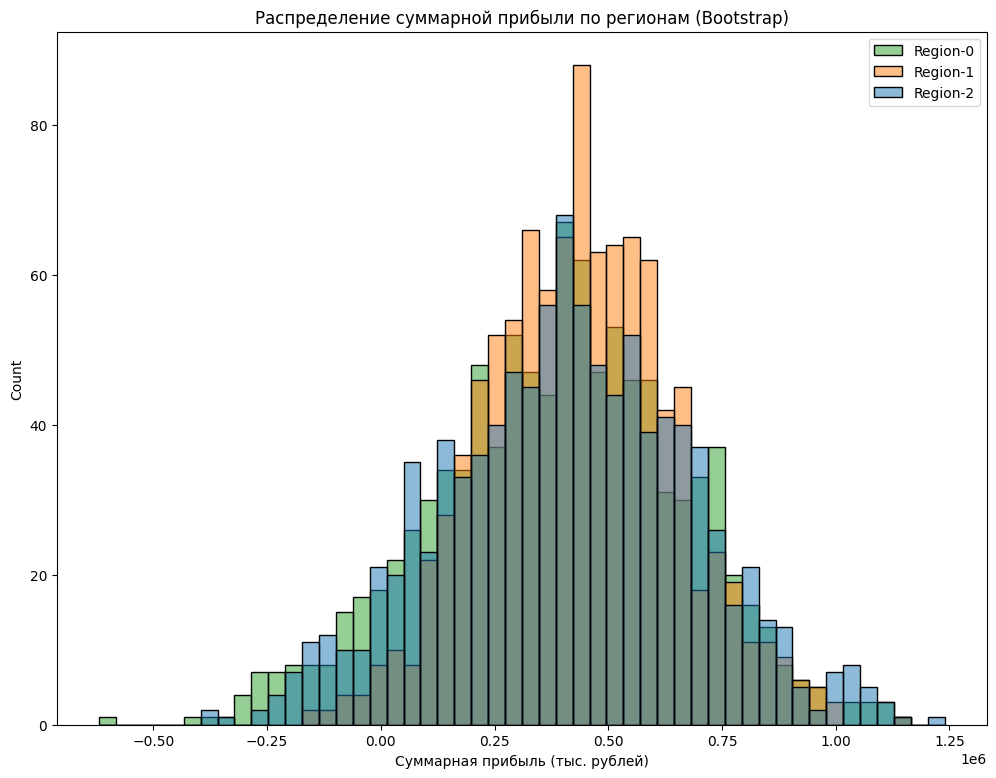

In [17]:
plt.figure(figsize=(12, 9))
sns.histplot(pd.DataFrame(sum_profit), bins=50, alpha=0.5)
plt.legend(['Region-0', 'Region-1', 'Region-2'])
plt.title('Распределение суммарной прибыли по регионам (Bootstrap)')
plt.xlabel('Количество')
plt.xlabel('Суммарная прибыль (тыс. рублей)')
plt.show()

По графику распределения суммарной прибыли видно, что для Региона-1 более редки случаи отрицательной прибыли, чем для Региона-0 и Региона-2. А также распределение по Региону-1 имеет меньший размах значений.

In [18]:
print('Процент случаев отрицательной прибыли для Регион-0, Регион-1, Регион-2 соответственно', *percent_of_unprofits.values(), 'процентов')

Процент случаев отрицательной прибыли для Регион-0, Регион-1, Регион-2 соответственно 7.4 1.7 8.6 процентов


Вероятность убытков ниже 2,5% показывает только Регион-1

In [19]:
sum_profit_df = pd.DataFrame(sum_profit)
sum_profit_df.columns = ['Region-0', 'Region-1', 'Region-2']

In [20]:
sum_profit_df.mean()

Region-0    408515.053884
Region-1    436119.513637
Region-2    385037.868036
dtype: float64

Самую большую среднюю суммарную прибыль показывает Регион-1 (436120 тыс. рублей)

In [21]:
print('95% доверительные интервалы ')
for i in range(3):
    print(f'Region-{i}: ', end='')
    print(round(pd.Series(sum_profit[i]).quantile(0.025)), round(pd.Series(sum_profit[i]).quantile(0.975)))

95% доверительные интервалы 
Region-0: -138678 952415
Region-1: 28879 865832
Region-2: -185863 885439


Нижние границы 95% доверительных интервалов для регионов 0 и 2 имеют довольно большие отрицательные значения, тогда как у Региона-1 нижняя граница положительная, то есть при выборе Региона-1 с 95% вероятностью будет получена прибыль 28879 тыс. рублей и более. При этом верхняя граница для Региона-1 не сильно меньше, чем для других регионов.

Вывод:

Для разработки я предлагаю Регион-1, так как он имеет самую низкую вероятность убытков (1.7%), самую высокую среднюю сумарную прибыль (436120 тыс. рублей), его 95% доверительный интервал полностью лежит в положительной области прибыли (28879, 865832). 